In [60]:
import pandas as pd
import matplotlib.pyplot as plt

In [53]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
ids = test['id']
df = pd.concat([train, test])

In [54]:
df = df.drop(columns = ['id'])

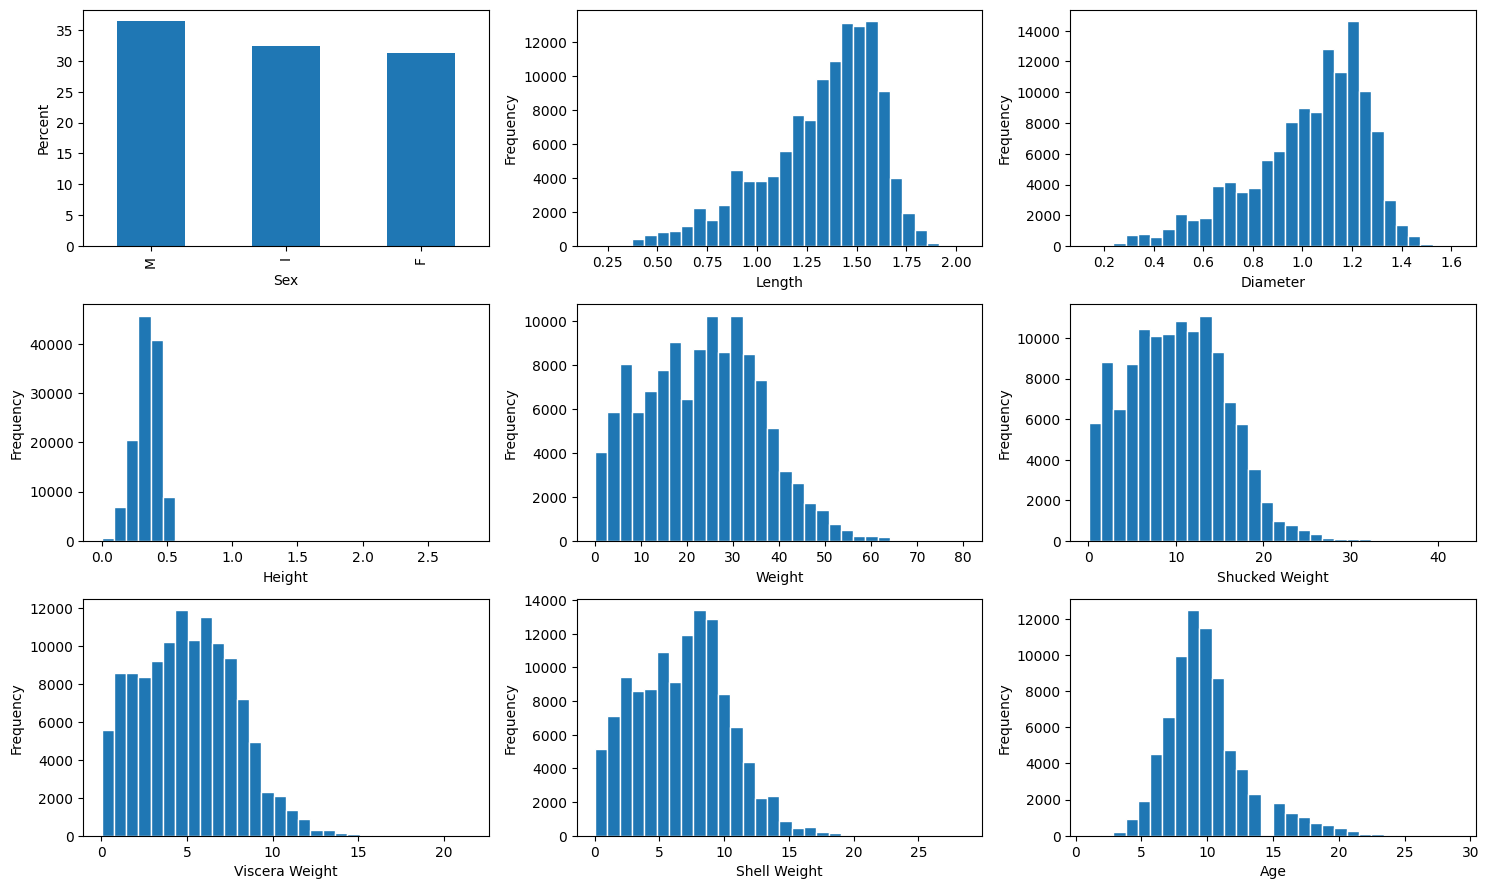

In [55]:
categorical = ['Sex']
numerical = df.columns.drop(categorical)

fig, axes = plt.subplots(3, 3, figsize=(15, 9))
axes = axes.flatten()
axes[0].set_ylabel('Percent')
axes[4].set_ylabel('Percent')
axes[8].set_ylabel('Percent')
for i, col in enumerate(categorical):
    (100* df[col].value_counts() / len(df)).plot.bar(ax = axes[i])
    axes[i].set_xlabel(col)
    
for i, col in enumerate(numerical):
    j = i+len(categorical)
    
    df[col].plot.hist(ax = axes[j], bins = 30, edgecolor='white')
    axes[j].set_xlabel(col)
    
plt.tight_layout()

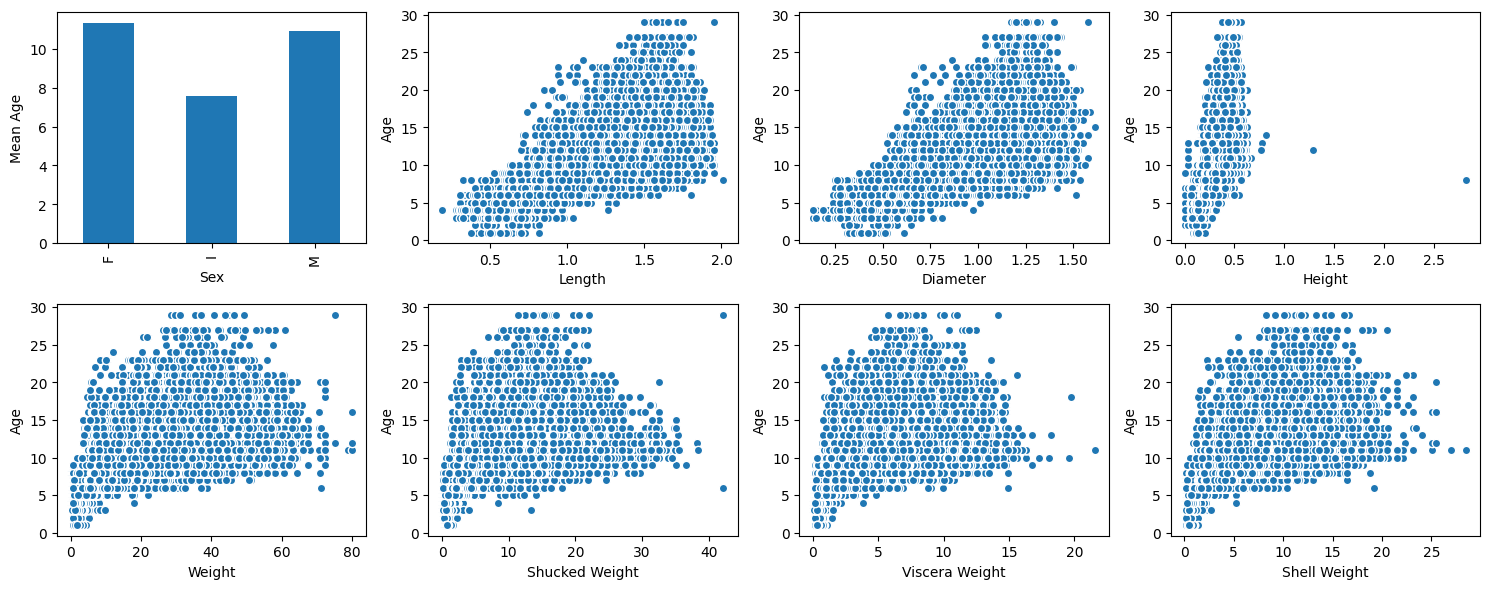

In [57]:
fig, axes = plt.subplots(2, 4, figsize=(15, 6))
axes = axes.flatten()
for i, col in enumerate(categorical):
    df.groupby(col)['Age'].mean().plot.bar(ax = axes[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Mean Age")
    
for i, col in enumerate(numerical[:-1]):
    j = i+len(categorical)
    
    axes[j].scatter(x=df[col], y=df['Age'], edgecolor='white', c = 'tab:blue')
    axes[j].set_ylabel('Age')
    axes[j].set_xlabel(col)
    
plt.tight_layout()

In [37]:
df_dummy = pd.get_dummies(df)

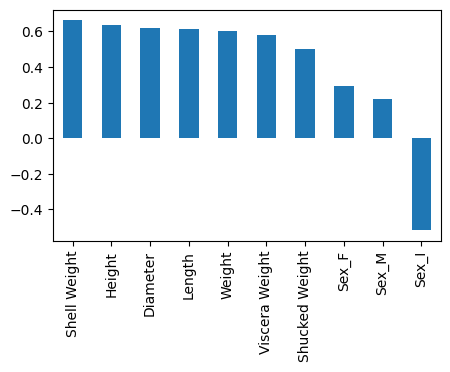

In [59]:
df_dummy.corr()['Age'].sort_values(ascending=False)[1:].plot.bar(figsize=(5,3))
plt.show()

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

X = df_dummy.drop(columns='Age')
y = df_dummy['Age']

features = X.columns.values

Scaler = StandardScaler()
Scaler.fit(X)
X = Scaler.transform(X)

X = pd.DataFrame(X, columns = features)

X_test = X[len(train):]
X = X.iloc[:len(train)]
y = y.iloc[:len(train)]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3)

In [42]:
from sklearn.linear_model import Ridge

model = Ridge()
model.fit(X_train, y_train)

print("Training score: ", model.score(X_train, y_train))
print("Validation score: ", model.score(X_valid, y_valid))

Training score:  0.5522503853209384
Validation score:  0.5474267365901347


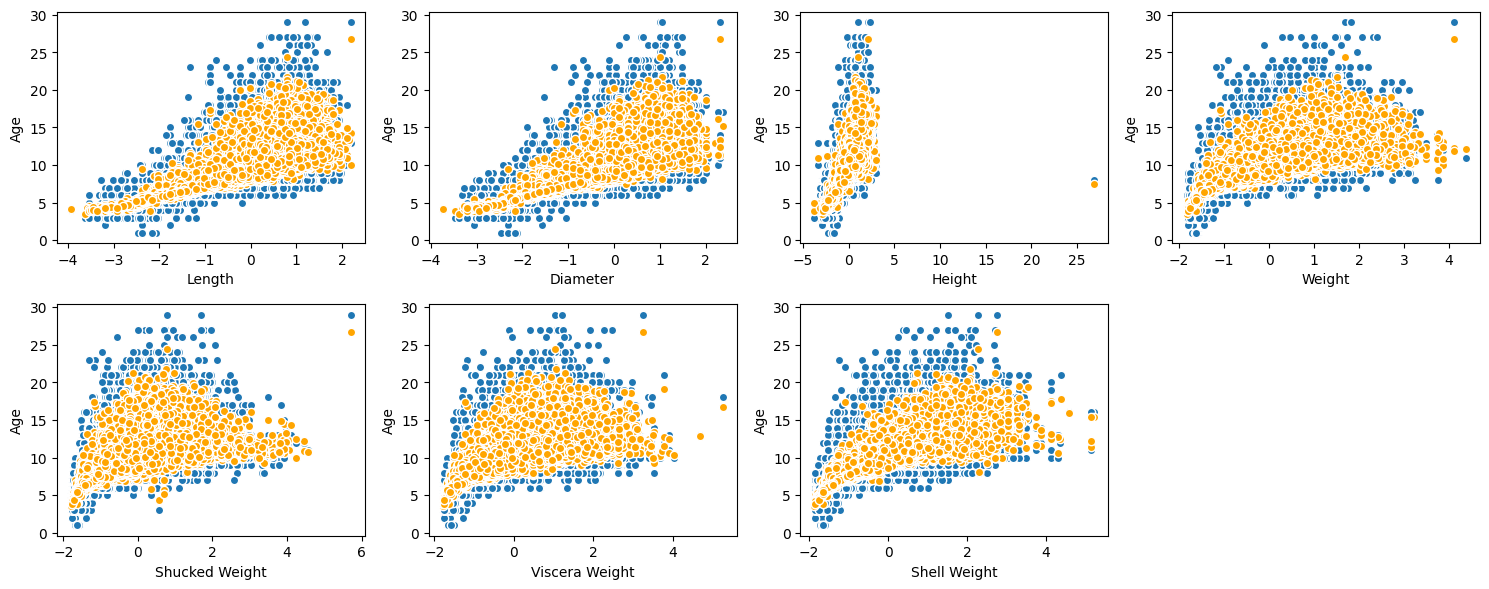

In [58]:
fig, axes = plt.subplots(2, 4, figsize=(15, 6))
axes = axes.flatten()
for j, col in enumerate(numerical[:-1]):
    axes[j].scatter(X_valid[col], y_valid, edgecolor='white')
    axes[j].scatter(X_valid[col], model.predict(X_valid), edgecolor='white', color='orange')
    axes[j].set_xlabel(col)
    axes[j].set_ylabel("Age")

axes[-1].axis('off')
    
plt.tight_layout()

In [49]:
from xgboost import XGBRegressor

model = XGBRegressor()
model.fit(X_train, y_train)

print("Training score: ", model.score(X_train, y_train))
print("Validation score: ", model.score(X_valid, y_valid))

Training score:  0.6947141359704114
Validation score:  0.5704230105191603


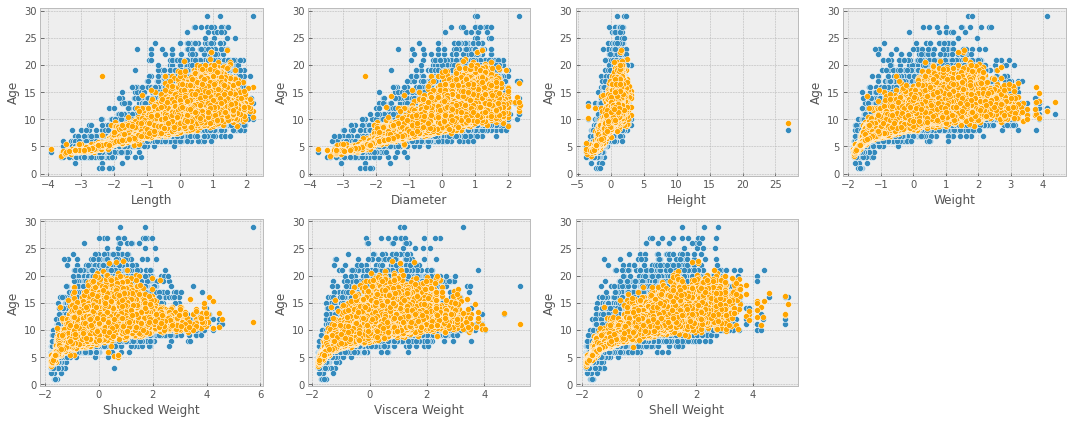

In [50]:
fig, axes = plt.subplots(2, 4, figsize=(15, 6))
axes = axes.flatten()
for j, col in enumerate(numerical[:-1]):
    axes[j].scatter(X_valid[col], y_valid, edgecolor='white')
    axes[j].scatter(X_valid[col], model.predict(X_valid), edgecolor='white', color='orange')
    axes[j].set_xlabel(col)
    axes[j].set_ylabel("Age")

axes[-1].axis('off')
    
plt.tight_layout()

In [51]:
final_model = XGBRegressor()
model.fit(X, y)
print("Training score: ", model.score(X, y))
y_test_pred = model.predict(X_test)

Training score:  0.6715162464803044


In [71]:
output = pd.DataFrame({'id': ids, 'Age': y_test_pred})

In [72]:
output.to_csv("Submission.csv", index=False)